## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder

### Load the dataset

In [5]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [6]:
# Listing Categorical and Numerical Columns in Dataframes

num_cols = tips._get_numeric_data().columns
num_cols

Index(['total_bill', 'tip', 'size'], dtype='object')

### 2. Compute the average bill amount for each day.

In [7]:
# Computing average amount

tips_avgDay=tips.groupby('day')['total_bill'].mean().reset_index()
tips_avgDay

,day,total_bill
0,Fri,17.151579
1,Sat,20.441379
2,Sun,21.410000
3,Thur,17.682742


### 3. Which gender is more generous in giving tips?

In [8]:
#tips_genmax=tips.groupby('sex')['total_bill'].max().reset_index()
#tips_genmax
tips.groupby('sex')['tip'].sum().round(2)

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [10]:
tips.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [11]:
tips.describe().tip

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [12]:
#tips_avgSize=tips.groupby('day')['size'].mean().reset_index()
#tips_avgSize
tips.groupby('day').size()

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

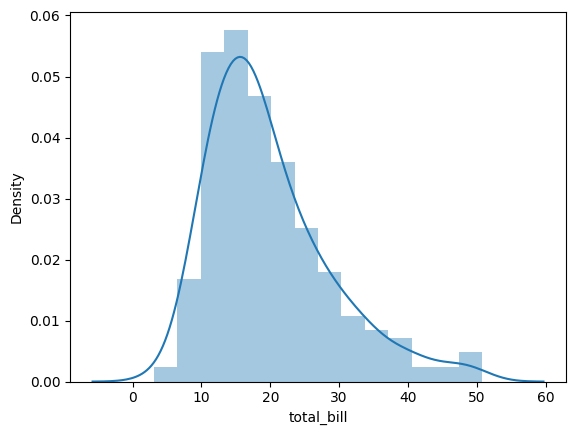

In [13]:
tips["total_bill"].skew()
sns.distplot(tips["total_bill"])
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

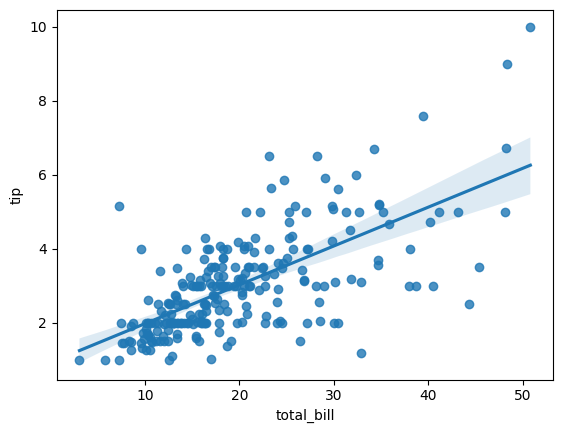

In [14]:
sns.regplot(x=tips["total_bill"], y=tips["tip"])
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

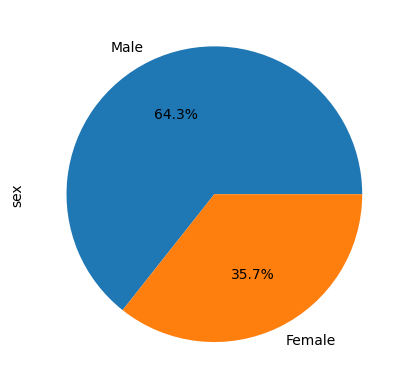

In [15]:
tips['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

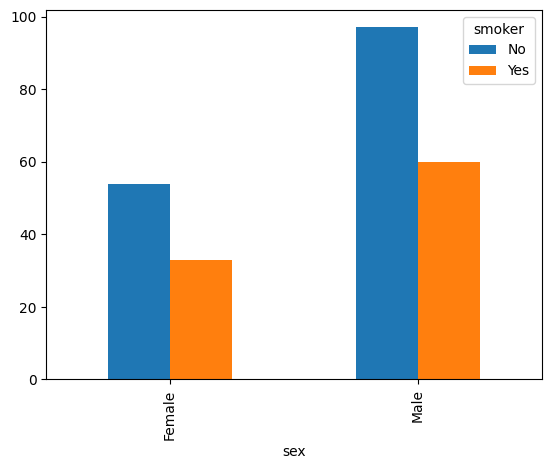

In [16]:
tips.groupby('sex')['smoker'].value_counts()
pd.crosstab(tips["sex"], tips["smoker"]).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

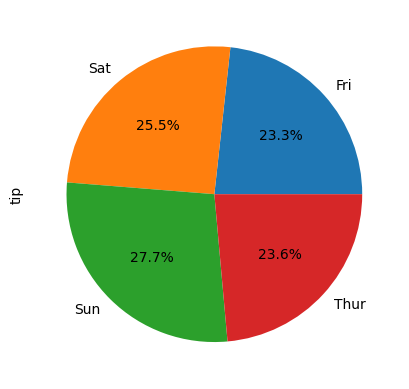

In [17]:
tips.groupby('day')['tip'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

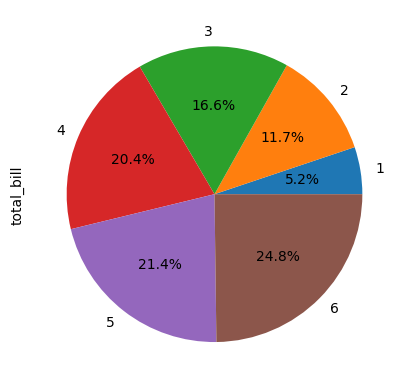

In [19]:
tips.groupby('size')['total_bill'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<Axes: xlabel='total_bill', ylabel='sex'>

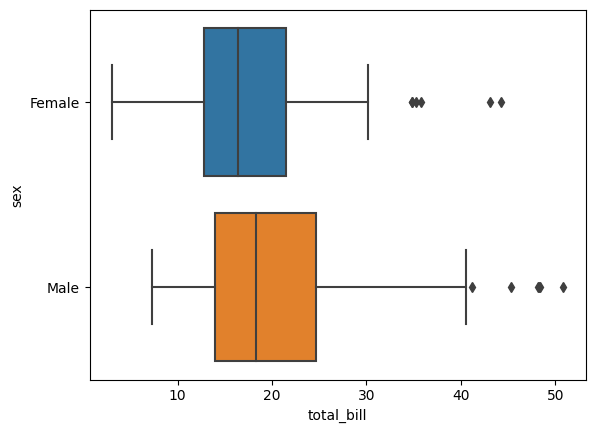

In [21]:
sns.boxplot(y=tips["sex"], x=tips["total_bill"])

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [24]:
x=tips.groupby('day')['total_bill'].max()
print(x)
x.loc[['Sat','Sun']]

day
Fri     40.17
Sat     50.81
Sun     48.17
Thur    43.11
Name: total_bill, dtype: float64


day
Sat    50.81
Sun    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [25]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [26]:
tips.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [27]:
len(tips)-len(tips.drop_duplicates())

1

In [28]:
tips_final=tips.drop_duplicates()

In [29]:
tips_final.duplicated().sum()

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

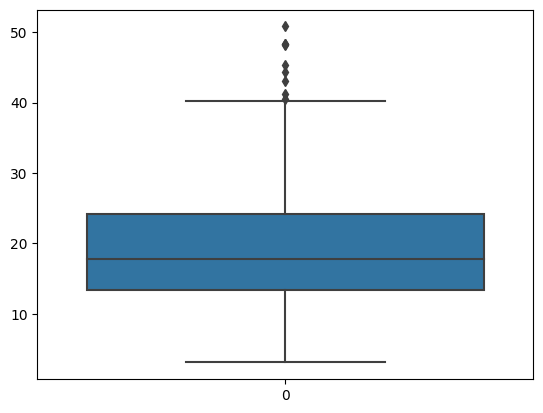

In [30]:
sns.boxplot(tips["total_bill"])
plt.show()

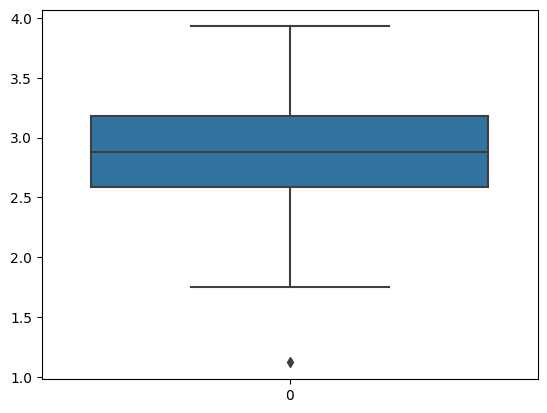

In [31]:
bill_log = np.log(tips["total_bill"])
sns.boxplot(bill_log)
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

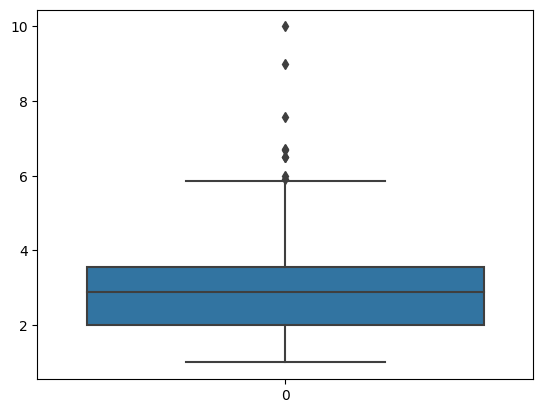

In [32]:
sns.boxplot(tips["tip"])
plt.show()

In [33]:
Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

2.0
3.5625
1.5625


In [34]:
# Calculate Lower Fence and Upper Fence for tip data

LOWER_FENCE = Q1 - (1.5*IQR)
UPPER_FENCE = Q3 + (1.5*IQR)
IQR = Q3-Q1
print(LOWER_FENCE)
print(UPPER_FENCE)   

-0.34375
5.90625


In [35]:
tips_clean = tips.loc[(tips['tip'] < UPPER_FENCE) & (tips['tip'] > LOWER_FENCE)]

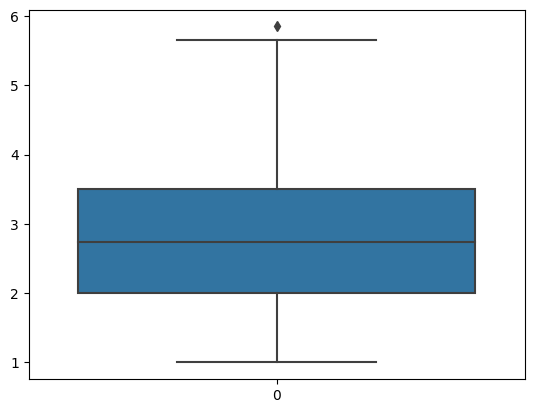

In [36]:
sns.boxplot(tips_clean["tip"])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [37]:
tips_cat=pd.get_dummies(tips,drop_first=True)
tips_cat.sample(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
154,19.77,2.00,4,1,0,0,1,0,0
182,45.35,3.50,3,1,1,0,1,0,0
240,27.18,2.00,2,0,1,1,0,0,0
110,14.00,3.00,2,1,0,1,0,0,0
222,8.58,1.92,1,1,1,0,0,0,1


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [38]:
bill_max = tips['total_bill'].max()
bill_min = tips['total_bill'].min()
range = bill_max - bill_min
print(range)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
tips['total_bill_mm'] = mm.fit_transform(tips[['total_bill']])
bill_mm_max = tips['total_bill_mm'].max()
bill_mm_min = tips['total_bill_mm'].min()
range = bill_mm_max - bill_mm_min
print(range)

47.74
0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [39]:
tips_df = tips

In [40]:
tips_df=pd.get_dummies(tips_df,drop_first=True)
tips_df.sample(5)

,total_bill,tip,size,total_bill_mm,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
176,17.89,2.00,2,0.310432,1,1,0,1,0,0
159,16.49,2.00,4,0.281106,1,0,0,1,0,0
164,17.51,3.00,2,0.302472,0,1,0,1,0,0
120,11.69,2.31,2,0.180561,1,0,0,0,1,1
202,13.00,2.00,2,0.208002,0,1,0,0,1,1


In [41]:
X = tips_df.drop(['tip'], axis=1)
X.sample(5)

,total_bill,size,total_bill_mm,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
193,15.48,2,0.259950,1,1,0,0,1,1
84,15.98,2,0.270423,1,0,0,0,1,1
180,34.65,4,0.661500,1,1,0,1,0,0
222,8.58,1,0.115417,1,1,0,0,0,1
195,7.56,2,0.094051,1,0,0,0,1,1


In [42]:
y = tips_df['tip']
y.sample(5)

139    2.75
219    3.09
241    2.00
150    2.50
164    3.00
Name: tip, dtype: float64

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

tips_scaled1 = tips_df.copy()

tips_scaled1.iloc[:,[0,2]] = min_max.fit_transform(tips_scaled1.iloc[:,[0,2]])
tips_scaled1.head()

,total_bill,tip,size,total_bill_mm,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.291579,1.01,0.2,0.291579,0,0,0,1,0,0
1,0.152283,1.66,0.4,0.152283,1,0,0,1,0,0
2,0.375786,3.50,0.4,0.375786,1,0,0,1,0,0
3,0.431713,3.31,0.2,0.431713,1,0,0,1,0,0
4,0.450775,3.61,0.6,0.450775,0,0,0,1,0,0


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [45]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.41637377433032574

### Happy Learning:)